<a href="https://colab.research.google.com/github/ferhatemrekoc/ExploratoryDataAnalysis-TelcoCustomerChurnDataset/blob/main/telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***TELCO CUSTOMER CHURN***

*First, the necessary libraries is added.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

*Then, the csv file is added and a dataframe named db is created.* 

In [ ]:
db_path='/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
db=pd.read_csv(db_path)
db.head()

FileNotFoundError: ignored

In [ ]:
db.shape

(7043, 21)

*There is 7043 rows and 21 columns in the dataset.*

*Now, we will get the information about the data and examine the data type. We will also compare the data type with the value in the dataframe if it is true or not.*

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*We saw there is no null value but We will again check the data if there is any data column null.*

In [ ]:
db.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*We will check number of unique values for each column.*

In [ ]:
db.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

*Although data type of "TotalCharges" is object, it has float values. We should change its data type to float type.*

In [ ]:
db['TotalCharges'] = pd.to_numeric(db['TotalCharges'])

ValueError: ignored

*Eventhough it is written there is no null value in TotalCharges column, we saw that there is some null values as " ". Now we will solve this by filling them NaN values.*

In [ ]:
db[db['TotalCharges']==" "]['TotalCharges'].count()

11

In [ ]:
db['TotalCharges']= db['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)

In [ ]:
db['TotalCharges'] = pd.to_numeric(db['TotalCharges'])

In [ ]:
db['TotalCharges'].dtype

dtype('float64')

*We found that there are 11 " " values in TotalCharges column and replace them with nan values and set the data type as float.*

In [ ]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


- Lets fill the nan values fot TotalCharges with previous data.

In [ ]:
for i in range(0, len(db.TotalCharges)):
    if pd.isnull(db.TotalCharges[i]):
        db.TotalCharges[i] = db.TotalCharges[i-1]
        
db.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7043.000,2285.170,2267.545,18.800,401.675,1398.250,3803.050,8684.800


- As we can see, after filling the null data our mean, std etc. has not changed much.

**Exploring Numerial Columns**



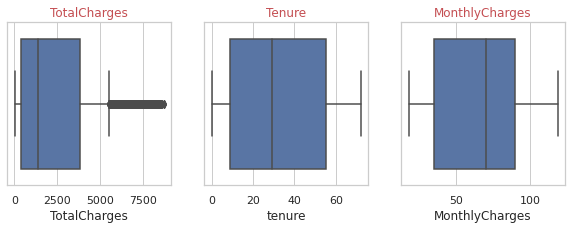

In [ ]:
plt.figure(figsize = (10,3))

plt.subplot(1,3,1)
sns.boxplot(db['TotalCharges'], whis=0.5)
plt.title("TotalCharges", c="r")

plt.subplot(1,3,2)
sns.boxplot(db['tenure'])
plt.title("Tenure", c="r")

plt.subplot(1,3,3)
sns.boxplot(db['MonthlyCharges'])
plt.title("MonthlyCharges", c="r")

plt.show()

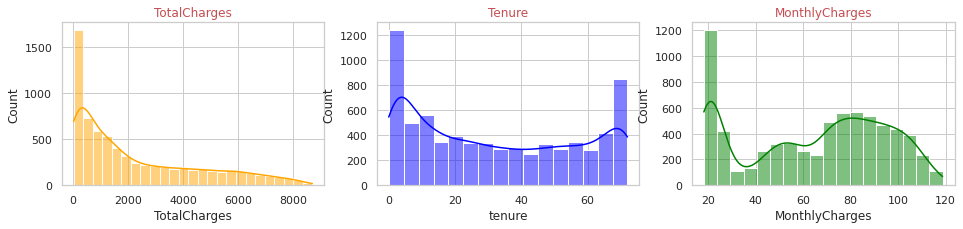

In [ ]:
plt.figure(figsize = (16,3))

plt.subplot(1,3,1)
sns.histplot(db['TotalCharges'], color="orange", kde=True)
plt.title("TotalCharges", c="r")

plt.subplot(1,3,2)
sns.histplot(db['tenure'], color="blue", kde=True)
plt.title("Tenure", c="r")

plt.subplot(1,3,3)
sns.histplot(db['MonthlyCharges'], color="green", kde=True)
plt.title("MonthlyCharges", c="r")

plt.show()

* As we see, there are some outliers in the TotalCharges column. Lets consider this values with log and winsorise.

In [ ]:
from scipy.stats.mstats import winsorize
db["winsorize_TotalCharges"] = winsorize(db["TotalCharges"], (0, 0.10))

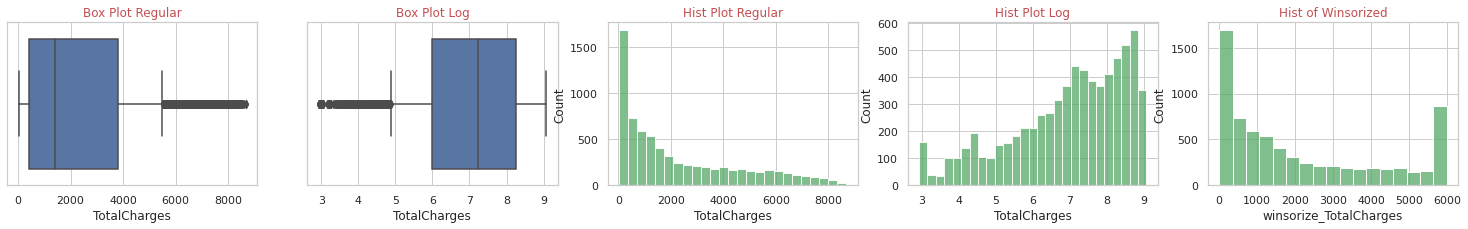

In [ ]:
plt.figure(figsize = (26,3))

plt.subplot(1,5,1)
sns.boxplot(db['TotalCharges'], whis=0.5)
plt.title("Box Plot Regular", c="r")

plt.subplot(1,5,2)
sns.boxplot(np.log(db['TotalCharges']), whis=0.5)
plt.title("Box Plot Log", c="r")

plt.subplot(1,5,3)
sns.histplot(db['TotalCharges'], color="g")
plt.title("Hist Plot Regular", c="r")

plt.subplot(1,5,4)
sns.histplot(np.log(db['TotalCharges']), color="g")
plt.title("Hist Plot Log", c="r")

plt.subplot(1,5,5)
sns.histplot(db['winsorize_TotalCharges'], color="g")
plt.title("Hist of Winsorized", c="r")

plt.show()

* As we can see above, after the log and winsorize process the distribution of data has been changed and log distribution is more likely to normal distribution.

In [ ]:
db["winsorize_MonthlyCharges"] = winsorize(db["MonthlyCharges"], (0, 0.10))
db["winsorize_tenure"] = winsorize(db["tenure"], (0, 0.10))

Text(0.5, 1.0, 'Hist of Winsorized MonthlyCharges')

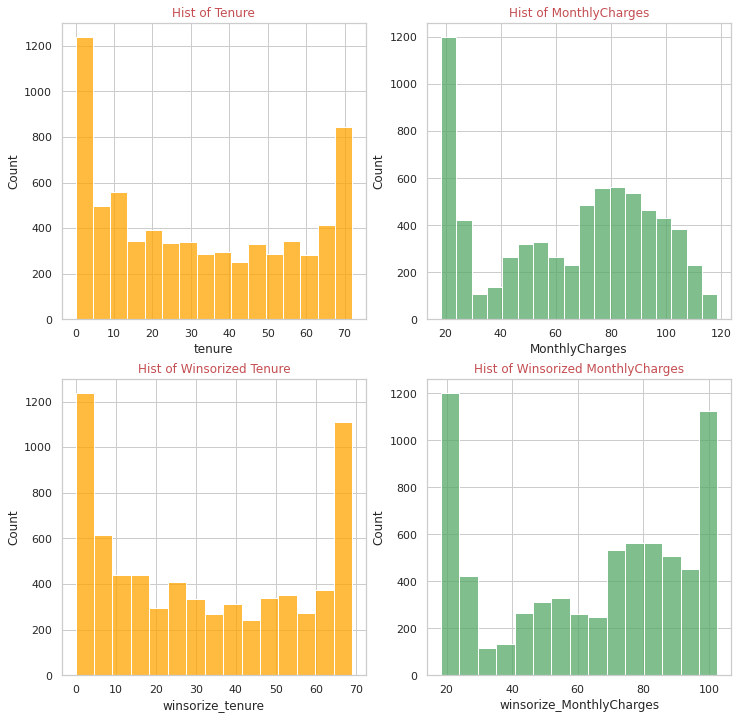

In [ ]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
sns.histplot(db['tenure'], color="orange")
plt.title("Hist of Tenure", c="r")

plt.subplot(2,2,2)
sns.histplot(db['MonthlyCharges'], color="g")
plt.title("Hist of MonthlyCharges", c="r")

plt.subplot(2,2,3)
sns.histplot(db['winsorize_tenure'], color="orange")
plt.title("Hist of Winsorized Tenure", c="r")

plt.subplot(2,2,4)
sns.histplot(db['winsorize_MonthlyCharges'], color="g")
plt.title("Hist of Winsorized MonthlyCharges", c="r")

- After winsorize, the distribution of tenure hasnt changed much but we can see the difference in MonthlyCharges column.

* Result of exploring numerical columns:
- Most of the customers are staying only in between 0-5 months in the company.
- Most of the customers having Monthly charges in between 20-25.

**Exploring Categorical Columns**

In [ ]:
db['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender of People')

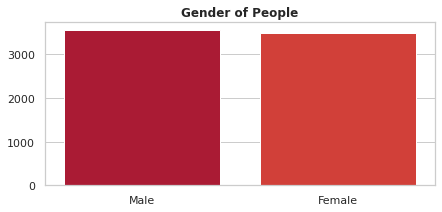

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("YlOrRd")
x=db['gender'].value_counts().index
y=db['gender'].value_counts().values.tolist()
data=db.groupby("gender").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Gender of People',weight = 'bold')

- When we compare the male and female customers, there is no big difference.

In [ ]:
db['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Text(0.5, 1.0, 'Senior Citizen or Not')

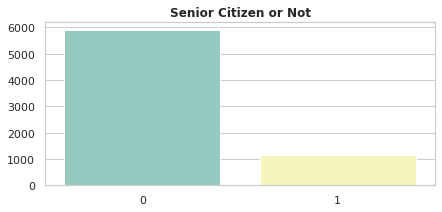

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
x=db['SeniorCitizen'].value_counts().index
y=db['SeniorCitizen'].value_counts().values.tolist()
data=db.groupby("SeniorCitizen").count()
sns.barplot(x=x,y=y,data=data, palette="Set3")
plt.title('Senior Citizen or Not',weight = 'bold')

- Our customers are more likely to be not a senior citizen.

In [ ]:
db['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Have Partner or Not?')

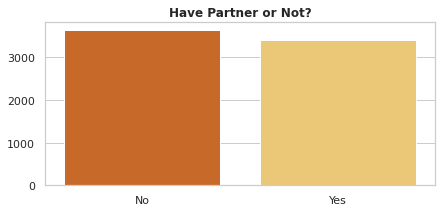

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("YlOrBr", len(data))
x=db['Partner'].value_counts().index
y=db['Partner'].value_counts().values.tolist()
data=db.groupby("Partner").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Partner or Not?',weight = 'bold')

- Most of the customers are not having partners.

In [ ]:
db['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Have Dependents or Not?')

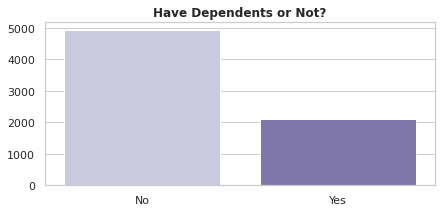

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Purples_r", len(data))
x=db['Dependents'].value_counts().index
y=db['Dependents'].value_counts().values.tolist()
data=db.groupby("Dependents").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Dependents or Not?',weight = 'bold')

- Customers are likely not to have dependents.

In [ ]:
db['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Text(0.5, 1.0, 'Have Phone Service or Not?')

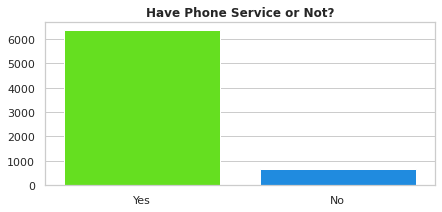

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("gist_rainbow_r", len(data))
x=db['PhoneService'].value_counts().index
y=db['PhoneService'].value_counts().values.tolist()
data=db.groupby("PhoneService").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Phone Service or Not?',weight = 'bold')

- Most of the customers are having phone services.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

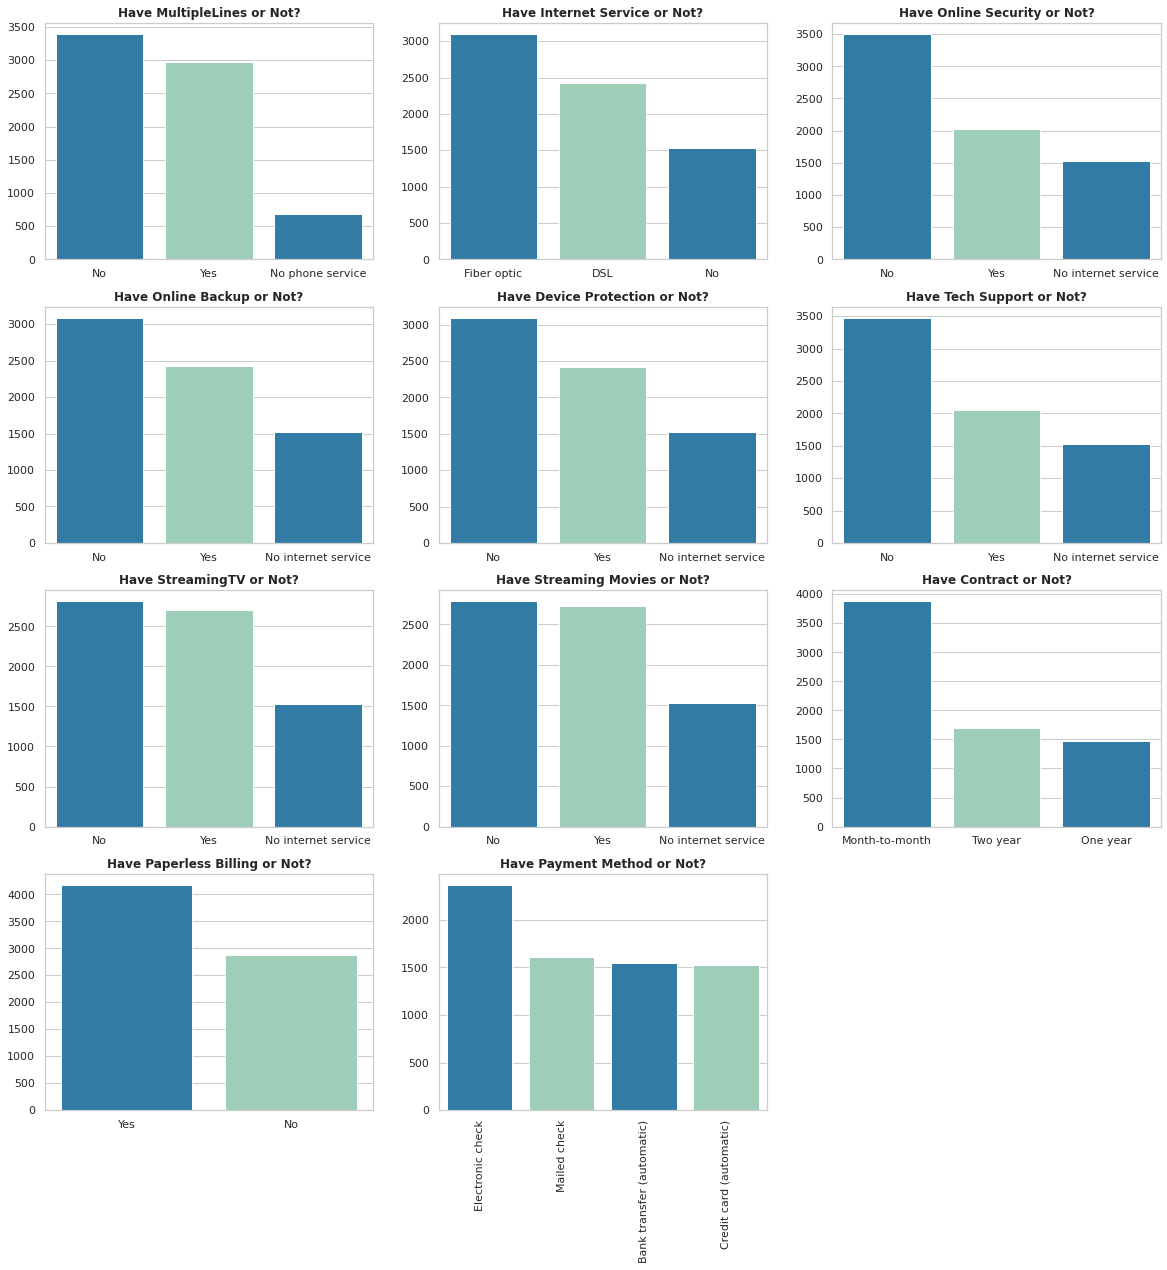

In [ ]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("YlGnBu", len(data))

plt.subplot(4,3,1)
x=db['MultipleLines'].value_counts().index
y=db['MultipleLines'].value_counts().values.tolist()
data=db.groupby("MultipleLines").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have MultipleLines or Not?',weight = 'bold')

plt.subplot(4,3,2)
x=db['InternetService'].value_counts().index
y=db['InternetService'].value_counts().values.tolist()
data=db.groupby("InternetService").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Internet Service or Not?',weight = 'bold')

plt.subplot(4,3,3)
x=db['OnlineSecurity'].value_counts().index
y=db['OnlineSecurity'].value_counts().values.tolist()
data=db.groupby("OnlineSecurity").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Online Security or Not?',weight = 'bold')

plt.subplot(4,3,4)
x=db['OnlineBackup'].value_counts().index
y=db['OnlineBackup'].value_counts().values.tolist()
data=db.groupby("OnlineBackup").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Online Backup or Not?',weight = 'bold')

plt.subplot(4,3,5)
x=db['DeviceProtection'].value_counts().index
y=db['DeviceProtection'].value_counts().values.tolist()
data=db.groupby("DeviceProtection").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Device Protection or Not?',weight = 'bold')

plt.subplot(4,3,6)
x=db['TechSupport'].value_counts().index
y=db['TechSupport'].value_counts().values.tolist()
data=db.groupby("TechSupport").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Tech Support or Not?',weight = 'bold')

plt.subplot(4,3,7)
x=db['StreamingTV'].value_counts().index
y=db['StreamingTV'].value_counts().values.tolist()
data=db.groupby("StreamingTV").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have StreamingTV or Not?',weight = 'bold')

plt.subplot(4,3,8)
x=db['StreamingMovies'].value_counts().index
y=db['StreamingMovies'].value_counts().values.tolist()
data=db.groupby("StreamingMovies").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Streaming Movies or Not?',weight = 'bold')

plt.subplot(4,3,9)
x=db['Contract'].value_counts().index
y=db['Contract'].value_counts().values.tolist()
data=db.groupby("Contract").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Contract or Not?',weight = 'bold')

plt.subplot(4,3,10)
x=db['PaperlessBilling'].value_counts().index
y=db['PaperlessBilling'].value_counts().values.tolist()
data=db.groupby("PaperlessBilling").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Paperless Billing or Not?',weight = 'bold')

plt.subplot(4,3,11)
x=db['PaymentMethod'].value_counts().index
y=db['PaymentMethod'].value_counts().values.tolist()
data=db.groupby("PaymentMethod").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Have Payment Method or Not?',weight = 'bold')
plt.xticks(rotation = 90)




In [ ]:
db['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Yes or No?')

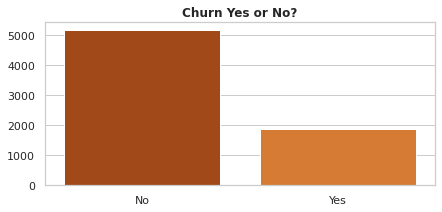

In [ ]:
plt.figure(figsize=(7,3))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("YlOrBr", len(data))
x=db['Churn'].value_counts().index
y=db['Churn'].value_counts().values.tolist()
data=db.groupby("Churn").count()
sns.barplot(x=x,y=y,data=data, palette=np.array(pal[::-1]))
plt.title('Churn Yes or No?',weight = 'bold')

- Most of the customers are not invloving Churn

* Now, lets see which factors effect a customer to churn or not.

In [ ]:
fig = px.histogram(data_frame = db,
             x = "gender",
             color="Churn", 
             title="Gender vs Churn",
             template='plotly_white')
fig.show()

- There is no big difference whether male or female are likely to churn.

In [ ]:
fig = px.histogram(data_frame = db,
             x = "SeniorCitizen",
             color="Churn", title="SeniorCitizen vs Churn",
             template='xgridoff')
fig.show()

- Customers who is not senior citizen tend to churn more than who is senior citizen.

In [ ]:
fig = px.histogram(data_frame = db,
             x = "Partner",
             color="Churn", title="Partner vs Churn",
             template='ggplot2')
fig.show()

- Customers dont have partner are more likely to tend to churn more than the ones have partner.

In [ ]:
fig = px.histogram(data_frame = db,
             x = "Dependents",
             color="Churn", title="Dependents vs Churn",
             template='ggplot2')
fig.show()

- Customers without dependent churned more.

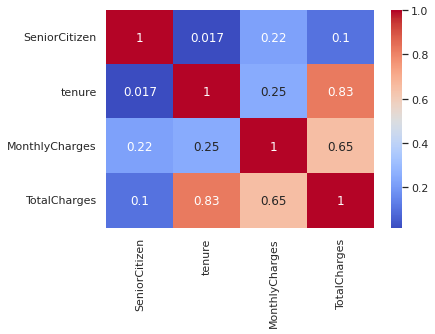

In [ ]:
sns.heatmap(db.corr(),annot=True,cmap="coolwarm")

- Tenure and TotalCharges have more correlation.

**FEATURE ENGINEERING**

* Lets create dummy variables for the gender variable.

In [ ]:
db['FemaleOrNot']=pd.get_dummies(db["gender"],drop_first=True)
db["PartnerOrNot"] = db.Partner.replace({'Yes':1, "No":0})
db["DependentOrNot"] = db.Dependents.replace({'Yes':1, "No":0})
db["PhoneServiceOrNot"] = db.PhoneService.replace({'Yes':1, "No":0})
db["PaperlessBillingOrNot"] = db.PaperlessBilling.replace({'Yes':1, "No":0})
db["ChurnOrNot"] = db.Churn.replace({'Yes':1, "No":0})

In [ ]:
db[['FemaleOrNot','PartnerOrNot','DependentOrNot','PhoneServiceOrNot','PaperlessBillingOrNot','ChurnOrNot']].head()

,FemaleOrNot,PartnerOrNot,DependentOrNot,PhoneServiceOrNot,PaperlessBillingOrNot,ChurnOrNot
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


- Now, lets interpret the Jarque-Bera test.

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

features = ["tenure", "TotalCharges", "MonthlyCharges"]
distribution_test = pd.DataFrame(columns=['feature', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
for feature in features:
    jb_stats = jarque_bera(np.log(db[feature]))
    norm_stats = normaltest(np.log(db[feature]))
    distribution_test = distribution_test.append({"feature": feature,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_test

,feature,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,tenure,nan,nan,nan,nan
1,TotalCharges,690.91930,0.00000,567.87455,0.00000
2,MonthlyCharges,891.33402,0.00000,1774.49689,0.00000


According to Jarque Bera test, p value is zero.So they dont have normal distribution.